## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

## Load the Data

In [ ]:
air_2 = pd.read_csv('cleaned_airline_passenger_satisfaction.csv')

In [ ]:
air_2.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Satisfaction Num,Type of Travel Num,Customer Type Num,Class Num
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,5,5,25,18.0,neutral or dissatisfied,1,2,1,2
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,4,1,1,6.0,neutral or dissatisfied,1,1,2,3
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,4,5,0,0.0,satisfied,2,1,1,3
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,1,4,2,11,9.0,neutral or dissatisfied,1,1,1,3
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,3,0,0.0,satisfied,2,1,1,3


## Feature Engineering

In [ ]:
# Creating a new column 'Satisfication Num' to either be 1 or 2
air_2['Gender Num'] = air_2['Gender'].map({
    'Male': 1,
    'Female': 2
})

In [ ]:
# Dropping the 'Unnamed:" column because its redundant has no use.
air_2.drop('Unnamed: 0', axis=1, inplace=True)  #Inplace= True makes it permanent
air_2.drop('Customer Type', axis=1, inplace=True)
air_2.drop('Type of Travel', axis=1, inplace=True)
air_2.drop('Gender', axis=1, inplace=True)
air_2.drop('Class', axis=1, inplace=True)
air_2.drop('Arrival Delay in Minutes', axis=1, inplace=True)
air_2.drop('satisfaction', axis=1, inplace=True)

<Axes: >

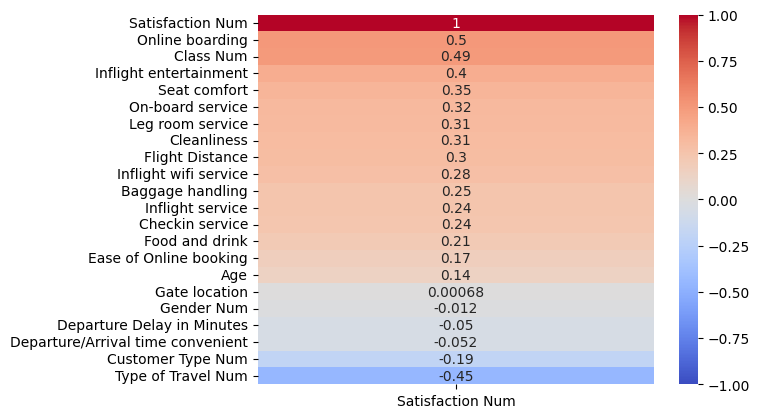

In [ ]:
# using a heat map to determine which columns is more useable to run for 'predicting'
sns.heatmap(air_2.corr(numeric_only = True)['Satisfaction Num'].sort_values(ascending = False).to_frame(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')

## Base Model

In [ ]:
# Features (assuming air_2 is defined earlier)
X = air_2.drop(columns='Satisfaction Num')
y = air_2['Satisfaction Num']

# Lists to store results across runs
acc_results = {'LogisticRegression': [], 'RandomForestClassifier': [], 'SVC': []}
f1_results = {'LogisticRegression': [], 'RandomForestClassifier': [], 'SVC': []}

In [ ]:
# Run the experiment 10 times with different random splits
for i in range(10):
    print(f"Running iteration {i+1}/10...")

    # Different random split each time
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42 + i
    )

    # Initialize models (no trailing commas!)
    lor = LogisticRegression(max_iter=1000)  # Increased max_iter to avoid convergence warnings
    rfc = RandomForestClassifier(n_estimators=200, random_state=42)
    sv = svm.SVC()  # Note: SVC can be slow; consider kernel='linear' if needed

    # Fit all models
    lor.fit(X_train, y_train)
    rfc.fit(X_train, y_train)
    sv.fit(X_train, y_train)

    # Predict
    pred_lor = lor.predict(X_test)
    pred_rfc = rfc.predict(X_test)
    pred_sv = sv.predict(X_test)

    # Calculate classification metrics (use these instead of RMSE/R²)
    acc_lor = accuracy_score(y_test, pred_lor)
    acc_rfc = accuracy_score(y_test, pred_rfc)
    acc_sv = accuracy_score(y_test, pred_sv)

    f1_lor = f1_score(y_test, pred_lor)  # Assuming binary classification; change average if multi-class
    f1_rfc = f1_score(y_test, pred_rfc)
    f1_sv = f1_score(y_test, pred_sv, average='binary')

    # Store results
    acc_results['LogisticRegression'].append(acc_lor)
    acc_results['RandomForestClassifier'].append(acc_rfc)
    acc_results['SVC'].append(acc_sv)

    f1_results['LogisticRegression'].append(f1_lor)
    f1_results['RandomForestClassifier'].append(f1_rfc)
    f1_results['SVC'].append(f1_sv)

Running iteration 1/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 2/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 3/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 4/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 5/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 6/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 7/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 8/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 9/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running iteration 10/10...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Aggregate and print averages
print("---------------------------")
print("Average Accuracy Scores:")
for model, scores in acc_results.items():
    print(f"{model}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

print("Average F1 Scores:")
for model, scores in f1_results.items():
    print(f"{model}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")
print("---------------------------")

---------------------------
Average Accuracy Scores:
LogisticRegression: Mean = 0.8741, Std = 0.0014
RandomForestClassifier: Mean = 0.9625, Std = 0.0011
SVC: Mean = nan, Std = nan
Average F1 Scores:
LogisticRegression: Mean = 0.8904, Std = 0.0014
RandomForestClassifier: Mean = 0.9673, Std = 0.0009
SVC: Mean = nan, Std = nan
---------------------------


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


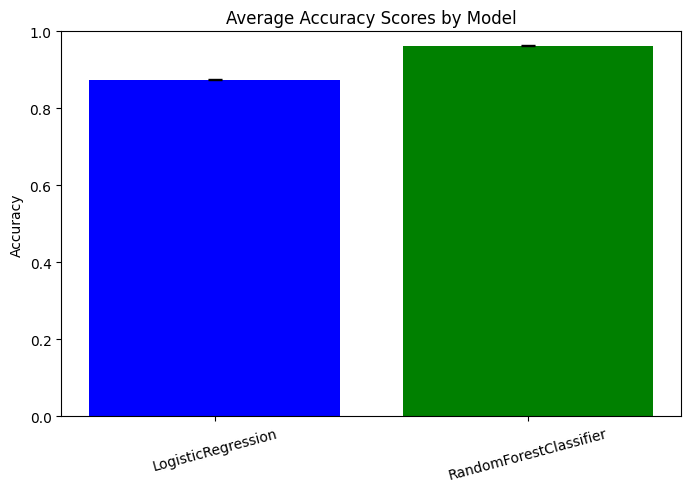

In [ ]:
# Visualize Average Accuracy Scores
models = list(acc_results.keys())
acc_means = [np.mean(scores) for scores in acc_results.values()]
acc_stds = [np.std(scores) for scores in acc_results.values()]

plt.figure(figsize=(8, 5))
plt.bar(models, acc_means, yerr=acc_stds, capsize=5, color=['blue', 'green', 'orange'])
plt.title('Average Accuracy Scores by Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.xticks(rotation=15)
plt.show()

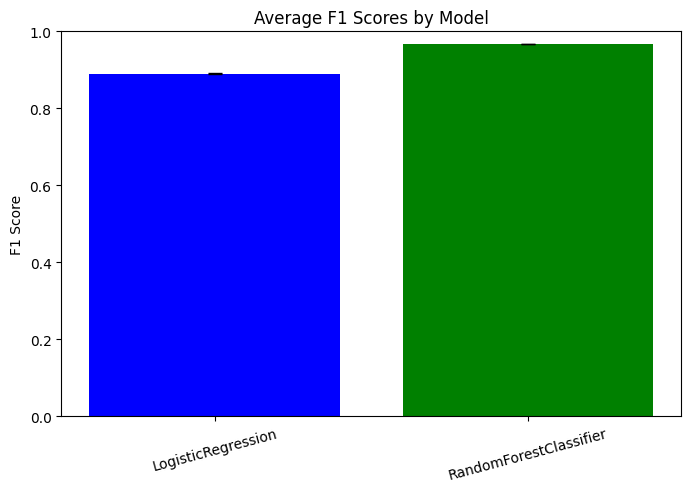

In [ ]:
# Visualize Average F1 Scores
f1_means = [np.mean(scores) for scores in f1_results.values()]
f1_stds = [np.std(scores) for scores in f1_results.values()]

plt.figure(figsize=(8, 5))
plt.bar(models, f1_means, yerr=f1_stds, capsize=5, color=['blue', 'green', 'orange'])
plt.title('Average F1 Scores by Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.xticks(rotation=15)
plt.show()

## The Model

In [ ]:
# Featues
X= air_2.drop(columns='Satisfaction Num')
y= air_2['Satisfaction Num']

In [ ]:
# Using X and Y split to train and test our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 ,random_state = 42 )

In [ ]:
# Scale only the numerical columns (optional but helps some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classification_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),  # Added max_iter to avoid convergence warnings
    'RandomForestClassifier': RandomForestClassifier(n_estimators=200, random_state=42),
    'SupportVectorMachine': svm.SVC()
}

## Evaluating the Model

Training LogisticRegression...
LogisticRegression - Train accuracy: 0.8741
LogisticRegression - Test accuracy: 0.8759

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           1       0.88      0.90      0.89     11713
           2       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



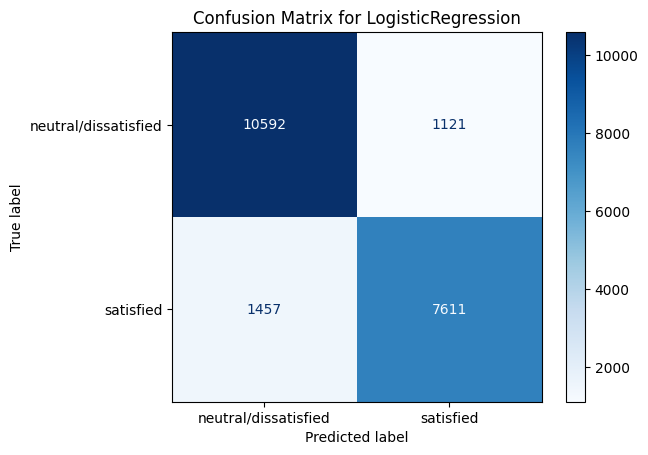


Training RandomForestClassifier...
RandomForestClassifier - Train accuracy: 1.0000
RandomForestClassifier - Test accuracy: 0.9629

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           1       0.95      0.98      0.97     11713
           2       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



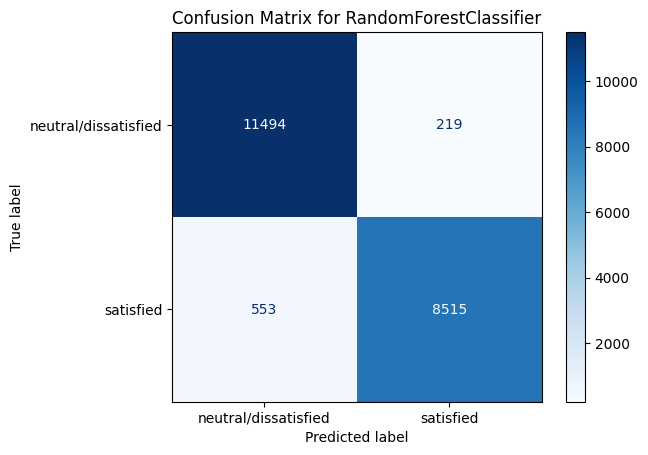


Training SupportVectorMachine...
SupportVectorMachine - Train accuracy: 0.9584
SupportVectorMachine - Test accuracy: 0.9541

Classification Report for SupportVectorMachine:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     11713
           2       0.96      0.93      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



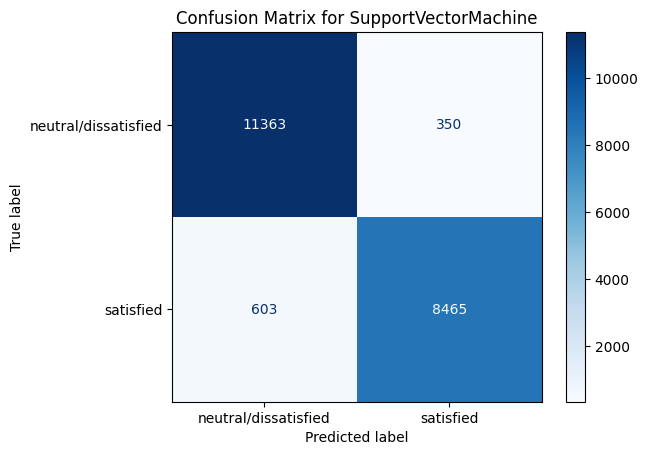

In [ ]:
# Dictionary to store results for comparison
results = {}

# 7. Train, score, and visualize each model
for model_name, model in classification_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Scores
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    print(f"{model_name} - Train accuracy: {train_score:.4f}")
    print(f"{model_name} - Test accuracy: {test_score:.4f}")

    # Classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix visualization (better for classification than scatterplot)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral/dissatisfied', 'satisfied'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Store results for bar plot
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'Accuracy': test_score,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
    print()  # Empty line for readability

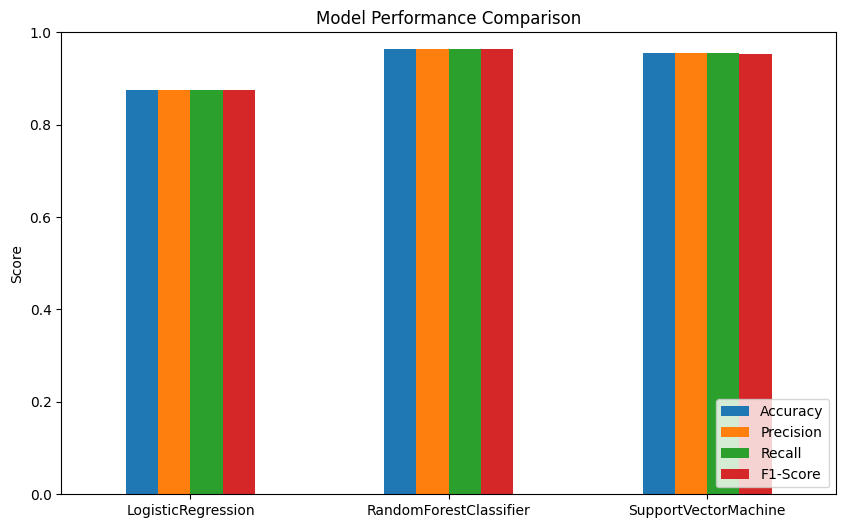

In [ ]:
# 8. Comparison bar plot (to show how all models did side-by-side)
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()